## Multi Linear Regression

The process of predicting the outcomes from many dependant features is known as multi linear regression. It is used when one feature is not capable emough to predict the outcomes.

Simple linear regression model has a continuous outcome and one predictor, 

whereas a multiple linear regression model has a continuous outcome and multiple predictors (continuous or categorical). 


# Download the Dataset


https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/


## Goal

To predict the relative performace of computer hardware from the available attributes of hardware.


## Python imports


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Read the Datasets

In [17]:
columns_names = ['VENDOR','MODEL_NAME','MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP' ];
datasets = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data', names=columns_names)

In [18]:
datasets.head()

,VENDOR,MODEL_NAME,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [19]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
VENDOR        209 non-null object
MODEL_NAME    209 non-null object
MYCT          209 non-null int64
MMIN          209 non-null int64
MMAX          209 non-null int64
CACH          209 non-null int64
CHMIN         209 non-null int64
CHMAX         209 non-null int64
PRP           209 non-null int64
ERP           209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


We have total 209 features in the datasets.

Let check the null values in the datasets


In [20]:
datasets.isnull().sum()

VENDOR        0
MODEL_NAME    0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64

In [21]:
datasets.head()

,VENDOR,MODEL_NAME,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


## Feature selection

In [23]:
backup_datasets = datasets
datasets.drop(['VENDOR','MODEL_NAME'], axis = 1, inplace=True)

In [24]:
datasets.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


In [25]:
X = datasets.iloc[:, :-1].values

In [26]:
X[:5]

array([[  125,   256,  6000,   256,    16,   128,   198],
       [   29,  8000, 32000,    32,     8,    32,   269],
       [   29,  8000, 32000,    32,     8,    32,   220],
       [   29,  8000, 32000,    32,     8,    32,   172],
       [   29,  8000, 16000,    32,     8,    16,   132]])

In [29]:
Y = datasets.iloc[:,-1:].values

In [30]:
Y[:5]

array([[199],
       [253],
       [253],
       [253],
       [132]])

In [31]:
X.shape,Y.shape

((209, 7), (209, 1))


## Split the datasets

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.10, random_state=42)

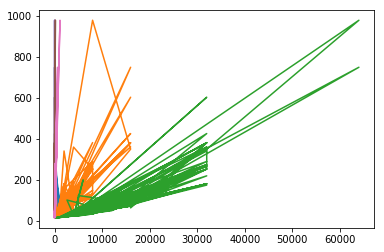

In [35]:
# visualize the datasets
plt.plot(xtrain,ytrain)


We need to scale the data befor fitting.


## Scaling the Data

In [40]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
sc_X.fit(xtrain)
sc_Y.fit(ytrain)


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
# Apply transformation to both training and test datasets
X_train = sc_X.transform(xtrain)

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [42]:
X_train[:5]

array([[-0.37273198, -0.51495345,  0.06506827, -0.21192436, -0.51189556,
        -0.63095111, -0.27564772],
       [-0.59760317,  0.37245785,  0.43795236,  0.97664333,  0.09623313,
        -0.30111083,  0.0989675 ],
       [ 2.58807208, -0.51495345, -0.6806999 , -0.50906628, -0.51189556,
        -0.63095111, -0.58415438],
       [ 2.58807208, -0.65930569, -0.96036296, -0.60811359, -0.51189556,
        -0.63095111, -0.63557215],
       [-0.44019334, -0.21914968, -0.30781581, -0.50906628, -0.51189556,
        -0.46603097, -0.34910169]])

In [43]:
X_test = sc_X.transform(xtest)
X_test[:5]

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[-0.69129951, -0.42325428, -0.80934491,  2.63568573,  1.16045834,
         0.27610964,  1.29626712],
       [-0.03542519, -0.51495345, -0.6806999 , -0.60811359, -0.51189556,
        -0.54849104, -0.49600962],
       [ 0.45179573, -0.51495345, -0.6806999 , -0.60811359, -0.20783122,
        -0.46603097, -0.55477279],
       [-0.67256024,  1.55567293,  4.91256137,  1.76902179,  1.16045834,
         6.54307484,  6.00466626],
       [ 2.21328676, -0.73503145, -0.30781581, -0.60811359, -0.51189556,
        -0.54849104, -0.59884517]])

In [45]:
Y_train = sc_Y.transform(ytrain)

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [46]:
Y_train[:5]

array([[-0.28226412],
       [ 0.22442521],
       [-0.52354475],
       [-0.59592894],
       [-0.40290444]])

In [47]:
Y_test  =sc_Y.transform(ytest)
Y_test[:5]

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[ 0.08769952],
       [-0.53158744],
       [-0.53158744],
       [ 6.65857547],
       [-0.45920325]])


## Train the model


In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


## Prediction

In [49]:
y_pred = regressor.predict(X_test)

In [50]:
y_pred

array([[ 0.60974982],
       [-0.63058965],
       [-0.62556619],
       [ 5.39806077],
       [-0.42631091],
       [ 1.7597362 ],
       [-0.31576716],
       [-0.80438696],
       [ 6.76814138],
       [ 1.18414977],
       [-0.02787911],
       [ 0.28264209],
       [-0.39265514],
       [-0.4280042 ],
       [-0.18215354],
       [-0.58743076],
       [-0.24833968],
       [-0.68479435],
       [ 0.33431394],
       [ 0.21244035],
       [-0.22116201]])

## Evaluate the prediction

In [51]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred,Y_test)

ValueError: continuous is not supported

## Confusion matrix is not supported for the continous value

In [71]:
from sklearn.metrics import mean_squared_error,r2_score
error_value = mean_squared_error(Y_test, y_pred)

In [72]:
error_value

0.39475902599235535

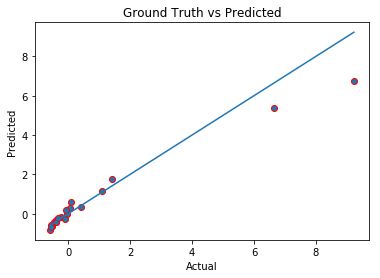

In [73]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_test, y_pred, edgecolors=(1, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()])
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [74]:
r2_score(Y_test,y_pred)

0.93421953942325731

## FINISH
